# Ensemble Methods Practice Notebook

Welcome to the practice notebook on ensemble methods! This notebook will guide you through the process of using ensemble techniques to predict customer churn. The dataset consists of various features related to bank customers, and your goal is to build predictive models to determine whether a customer will churn. Here is a brief explanation of the dataset's columns:

- **`customer_id`**: A unique identifier for each customer.
- **`credit_score`**: The customer's credit score.
- **`country`**: The country where the customer resides.
- **`gender`**: The customer's gender.
- **`age`**: The customer's age.
- **`tenure`**: The number of years the customer has been with the bank.
- **`balance`**: The customer's account balance.
- **`products_number`**: The number of bank products the customer uses.
- **`credit_card`**: Indicates whether the customer has a credit card (1 = Yes, 0 = No).
- **`active_member`**: Indicates whether the customer is an active member (1 = Yes, 0 = No).
- **`estimated_salary`**: The customer's estimated annual salary.
- **`churn`**: The target variable, indicating whether the customer has churned (1 = Yes, 0 = No).

As you work through the notebook, you will load the data, preprocess it, and apply various ensemble methods such as Random Forest to predict the churn status. Remember to evaluate the performance of your models using appropriate metrics. Enjoy your practice and aim to identify the most effective ensemble technique for this problem!

## Task
Your task is to:
1. Load the dataset.
2. Preprocess the data (if necessary).
3. Implement Bagging models.
4. Evaluate the models performance.

# Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Load the dataset


In [3]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns, relationships, and anomalies in the dataset. Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `churn` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features to identify potential multicollinearity.

In [5]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


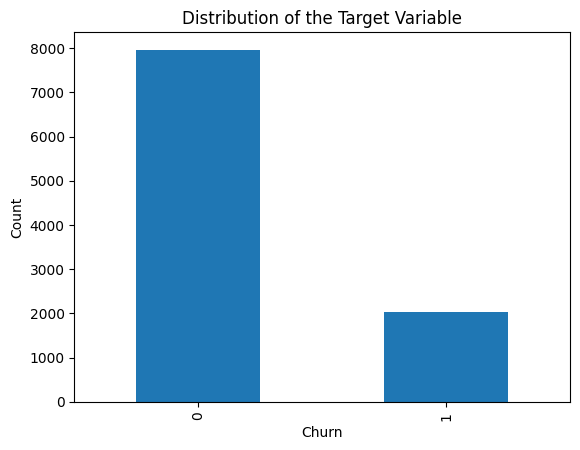

In [6]:
target_distribution = df['churn'].value_counts()
target_distribution.plot(kind='bar')
plt.title('Distribution of the Target Variable')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

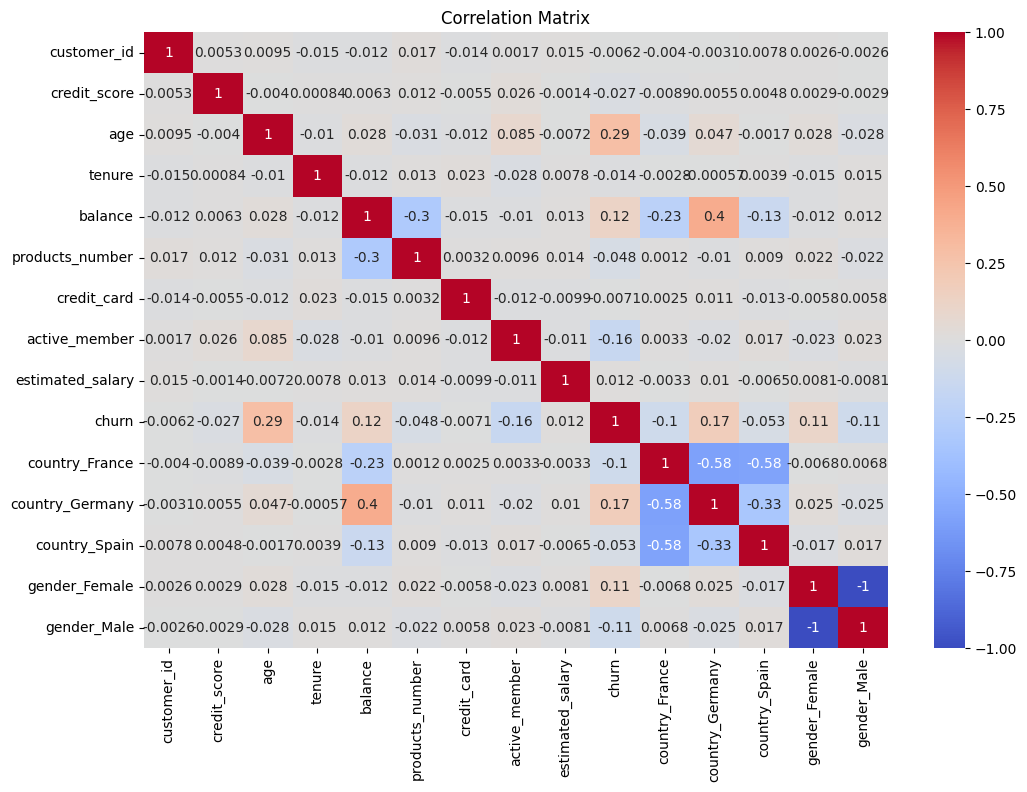

In [7]:
df_encoded = pd.get_dummies(df)

# Correlation matrix
correlation_matrix = df_encoded.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding. In this dataset, the `country` and `gender` columns are categorical.

3. **Fearture Scaling**: Standardize or Normalize numerical features to have a consistent scale, especially if you plan to use models sensitive to feature scaling. Consider using StandadScaler or MinMaxScaler from the `sklearn.preprocessing` module.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling. For instance, `customer_id` is a unique identifier and doesn't contribute to predicting churn.

In [8]:
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [9]:
df_encodeed = pd.get_dummies(df, columns=['country', 'gender'])
print(df_encodeed.head())

   customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  country_France  \
0            1              1         101348.88      1            True   
1            0              1         112542.58      0           False   
2            1              0         113931.57      1            True   
3            0              0          93826.63      0            True   
4            1              1          79084.10      0           False   

   country_Germany  country_Spain  gender_Female  gender_Male  
0            False          False           True    

In [10]:
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
scaler = StandardScaler()
df_encodeed[numerical_features] = scaler.fit_transform(df_encodeed[numerical_features])

In [11]:
label_encoder = LabelEncoder()

df['country']= label_encoder.fit_transform(df['country'])
df['gender']= label_encoder.fit_transform(df['gender'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Distribution of Numerical Features**: Plot histograms to see the distribution of numerical features such as `age`, `balance`, and `estimated_salary`.

2. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as `country`, `gender`, and `products_number`.

3. **Churn Rate Analysis**: Visualize the churn rate in relation to different features to identify patterns or factors that might influence churn.

4. **Pair Plot**: Use a pair plot to visualize relationships between numerical features and see how they are distributed across different classes of the target variable.

5. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

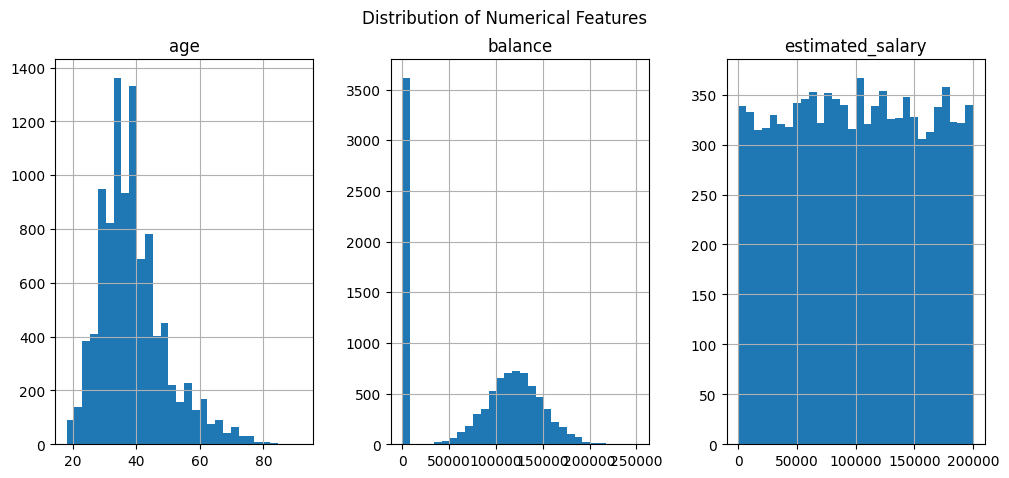

In [13]:
numerical_features = ['age', 'balance', 'estimated_salary']
df[numerical_features].hist(bins=30, figsize=(12, 5), layout=(1, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

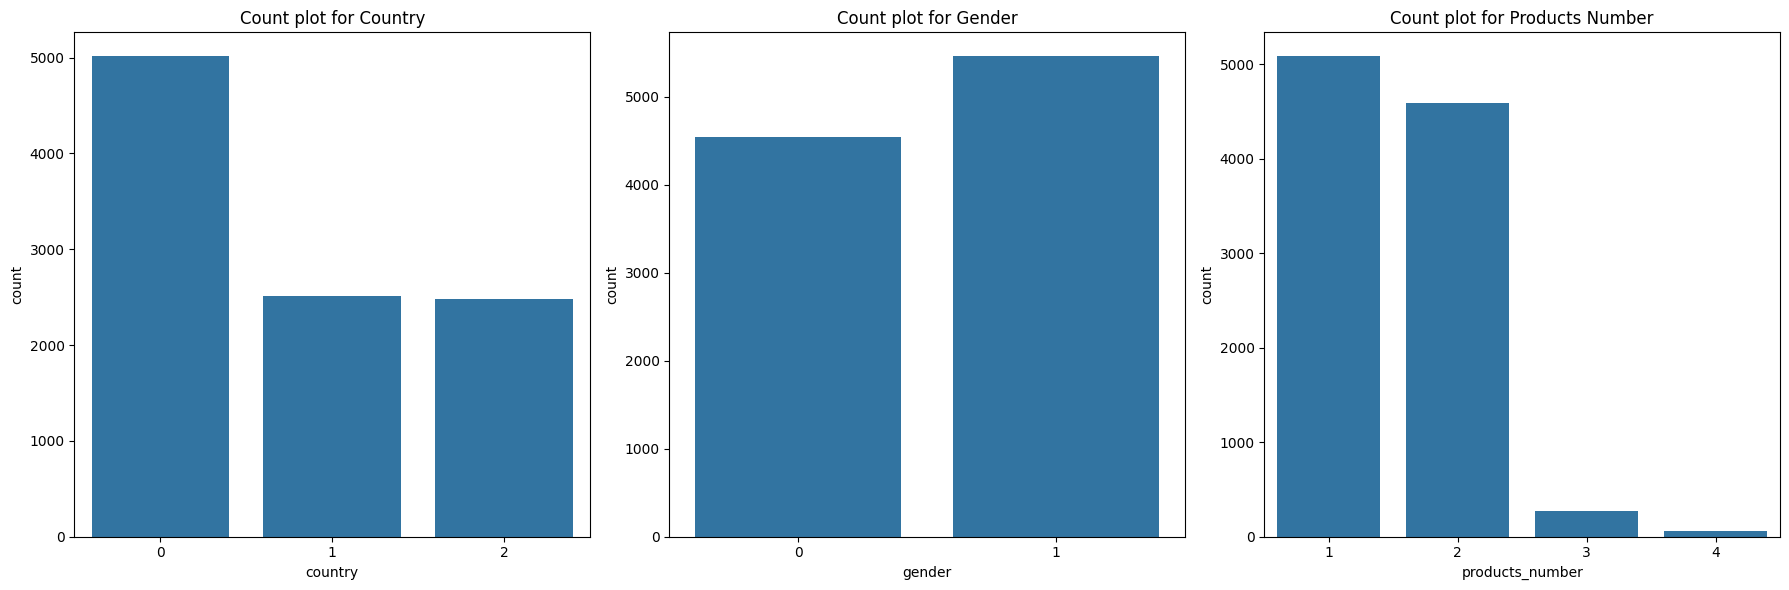

In [14]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='country')
plt.title('Count plot for Country')
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='gender')
plt.title('Count plot for Gender')
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='products_number')
plt.title('Count plot for Products Number')
plt.tight_layout()
plt.show()

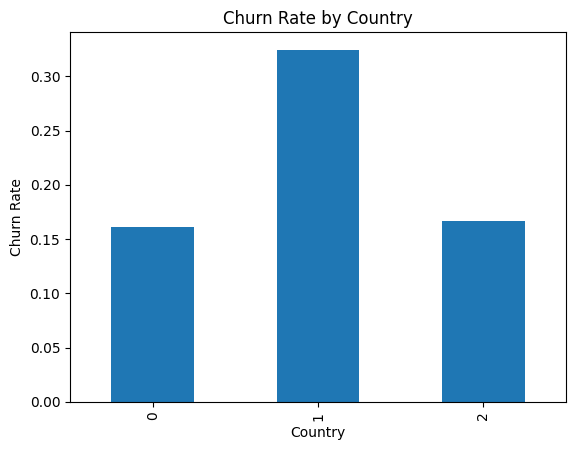

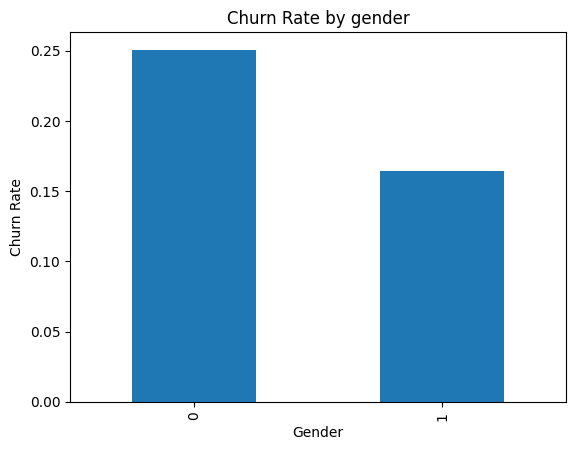

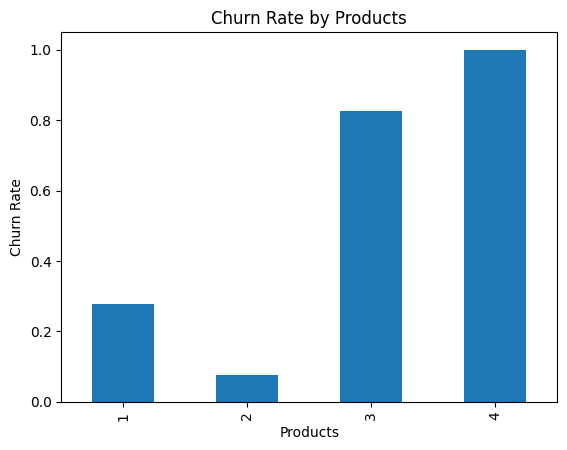

In [15]:
churn_by_country = df.groupby('country')['churn'].mean()
churn_by_country.plot(kind='bar')
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.show()
churn_by_gender = df.groupby('gender')['churn'].mean()
churn_by_gender.plot(kind='bar')
plt.title('Churn Rate by gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()
churn_by_products = df.groupby('products_number')['churn'].mean()
churn_by_products.plot(kind='bar')
plt.title('Churn Rate by Products')
plt.xlabel('Products')
plt.ylabel('Churn Rate')
plt.show()


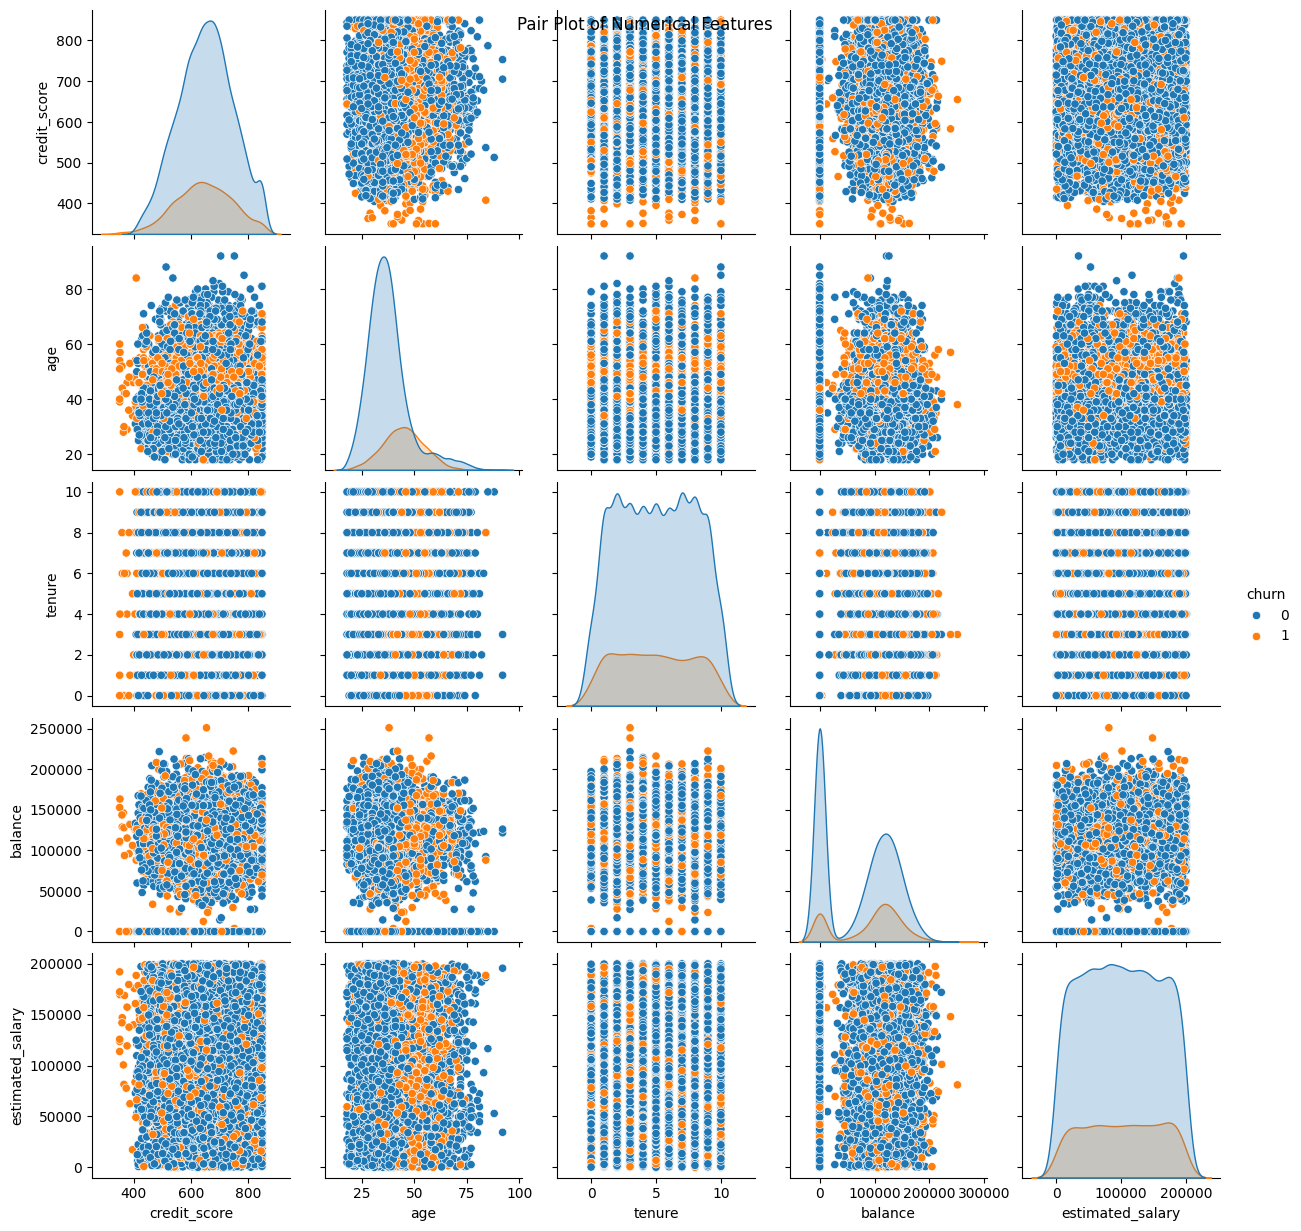

In [16]:
sns.pairplot(df, vars=['credit_score', 'age', 'tenure', 'balance', 'estimated_salary'], hue='churn')
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

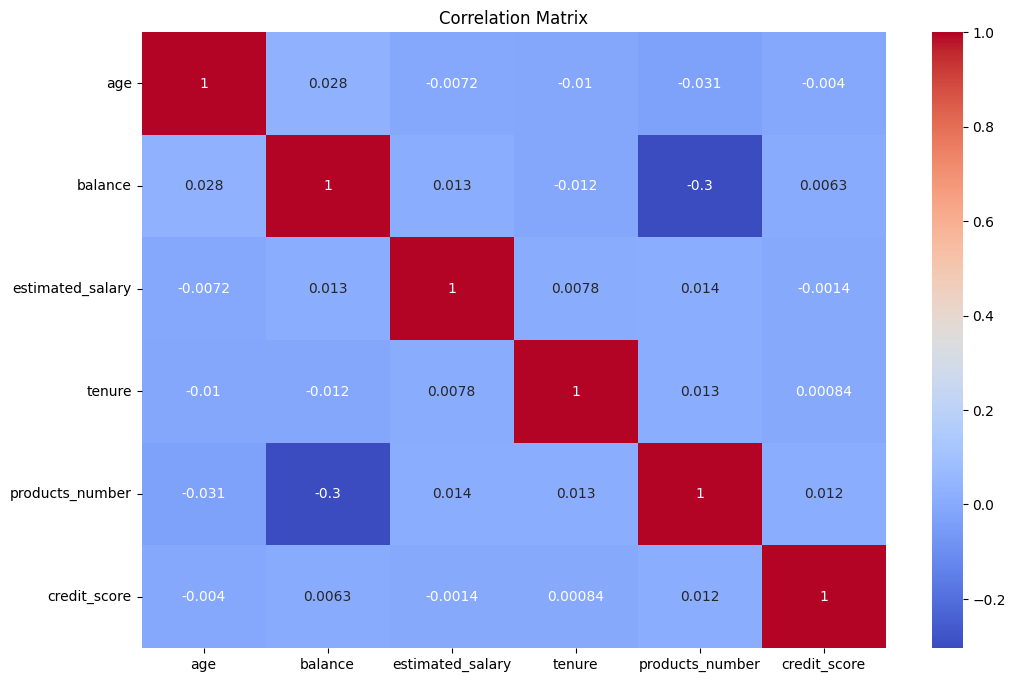

In [17]:
numerical_features = ['age', 'balance', 'estimated_salary', 'tenure', 'products_number', 'credit_score']
correlation_matrix = df[numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split the Dataset

Splitting the dataset into training and testing sets is essential for evaluating the performance of your models. This ensures that the models are trained and evaluated on separate data, providing an unbiased assessment of their predictive capabilities.

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data. Typically, 70-80% of the data is used for training, and 20-30% is used for testing.

In [18]:
X = df.drop('churn', axis=1)
y = df['churn']

In [19]:
X = df[['age', 'balance', 'products_number', 'active_member', 'credit_score', 'credit_card']]
y = df['churn']


In [20]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Random Forest
Initialize and train a Random Forest classifier.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


### Evaluate the model performance

In [22]:
print('Model accuracy score' , accuracy_score(y_test, y_pred))

Model accuracy score 0.848


In [23]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8480


## XGBoost
Initialize and train an XGBoost classifier.

In [24]:
xgb_classifier = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
print(y_pred)

[0.02887872 0.02755663 0.0429347  ... 0.76808673 0.27916822 0.29040068]


### Evaluate the model performance

In [25]:
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy:" ,(accuracy))

Accuracy: 0.852


### Comparing Model Performance

In [32]:
# Here is a Random Forest Predictions
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R2: {rf_r2}')


Random Forest Accuracy: 0.848
Random Forest MSE: 0.152
Random Forest R2: 0.03729073344828826


In [34]:
# Here is a XGBoost Predictions
xgb_y_pred = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred.round())  # Here is a Round for classification
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f'XGBoost Accuracy: {xgb_accuracy}')
print(f'XGBoost MSE: {xgb_mse}')
print(f'XGBoost R2: {xgb_r2}')


XGBoost Accuracy: 0.852
XGBoost MSE: 0.1171787871759596
XGBoost R2: 0.25783484041061067


* **Random Forest**

Accuracy: 0.848: This means that the Random Forest model correctly predicted 84.8% of the instances in the test set.

MSE: 0.152: Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. A lower MSE indicates better performance. Here, the MSE is 0.152, which is relatively low.

R²: 0.037: R-squared (R²) indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² of 0.037 means that only 3.7% of the variance in the target variable is explained by the model, suggesting that the model might not be capturing all the underlying patterns in the data.

* **XGBoost**

Accuracy: 0.852: The XGBoost model correctly predicted 85.2% of the instances in the test set, slightly better than the Random Forest model.

MSE: 0.117: The MSE for XGBoost is 0.117, which is lower than that of the Random Forest model, indicating better performance in terms of prediction accuracy.

R²: 0.258: An R² of 0.258 means that 25.8% of the variance in the target variable is explained by the model. This is significantly higher than the R² for the Random Forest model, suggesting that XGBoost is better at capturing the underlying patterns in the data.


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

```
# This is formatted as code
```



In [26]:
base_model = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, random_state=42))
]

### Define meta-learner (LogisticRegression)

> Add block quote



In [27]:
meta_learner = LogisticRegression()
stacking_classifier = StackingClassifier(estimators=base_model, final_estimator=meta_learner)

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [28]:
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)

### Evaluate the model performance

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8555


# Practice Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?

* **Challenges and Learnings**
   - What were the main challenges you faced during this project, and how did you overcome them?
   - What are your key takeaways from this exercise, and how would you apply these learnings to future projects?


# Answer here:

* **Features Selection and Engineering**
Based on the correlation matrix, There is some features appear to be most important for predicting churn

      1- Age 2- Balance 3- Number of products 4- Active of Preducts 5- Active Member 6- Estimated Salary

These features are singnificant becaues they have stronger relationship with the customers decision, and they are showed by their correlation values with (churn) variable.

* **Model Selection**
Choose from the Ensemble method
      1- Random Forest 2- XGBoost
 The RF is less likely overfit compared to individual decision trees because it averages multiple tree, also its works very well with classification.

 The XGB often outperforms other algorthms due to its advanced boositng techniques, also it is optimized for speed and perormance, making it suitable for large datasets.

* **Model Evaluation Metrics**

Random Forest:
        With an accuracy of 0.8480,
the Random Forest model performs well but might still have room for improvement.
XGBoost: Slightly better accuracy at 0.852, indicating that the boosting technique helps in capturing more complex patterns.
Stacking Classifier: The highest accuracy at 0.8555 suggests that combining multiple models (stacking) leverages their strengths and mitigates their weaknesses, leading to better overall performance.


